In [49]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_predict
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
import sklearn.cluster
from numpy import quantile, where, random
import matplotlib.pyplot as plt

# loading data, spliting, and training on svm

In [50]:
data = pd.read_csv("powerline_dataset.csv")
y=data[['Output (S)']]
data = data[['Output (S)', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']]
X=data[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']]
trr=data[['Output (S)']]
tss=data[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']]
X = X.to_numpy()
y=y.to_numpy()



scaler = StandardScaler()
X=scaler.fit_transform(X)


sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
sss.get_n_splits(X, y)

#stratified split


for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

svm_clf = SVC() 
svm_clf.fit(X_train,y_train)




print(X)


TRAIN: [5642 7676 3938 ... 5933 1426 5502] TEST: [ 8715  5432 10584 ... 11445  6784 11121]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[-0.46979973  0.10009242  0.459871    0.12701278 -1.80193373  1.71922075]
 [-0.34190004  0.09155696  0.31027008  0.26424305 -1.71438652  1.49236984]
 [-0.25685457  0.08496841  0.21187509  0.37696635 -1.64913814  1.31499272]
 ...
 [-0.19132295  0.17633503  0.01242719  0.29632386 -1.51753252  1.26017073]
 [-0.1902171   0.17355147  0.01434143  0.3231795  -1.52559472  1.24180512]
 [-0.18907368  0.1707642   0.01621315  0.34993927 -1.53325752  1.22312557]]


# evaluation starts heere

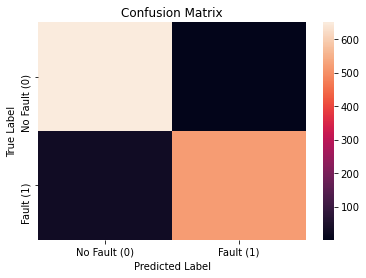

In [51]:
y_pred = svm_clf.predict(X_test)
y_test = y_test
conf_mat = confusion_matrix(y_test, y_pred)
lang = ['No Fault (0)', 'Fault (1)']
ax = plt.axes()
sns.heatmap(conf_mat, xticklabels=lang, yticklabels=lang)
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [52]:
true_positive = conf_mat[1, 1]
true_negative = conf_mat[0, 0]
false_positive = conf_mat[0, 1]
false_negative = conf_mat[1, 0]
accuracy = accuracy_score(y_pred, y_test)
print("SVM Classifier")
print("True Positives:", true_positive)
print("True Negatives:", true_negative)
print("False Positives:", false_positive)
print("False Negatives:", false_negative)
print("Precision:", true_positive/(true_positive+false_positive))
print("Recall:", true_positive/(true_positive+false_negative))
print("Accuracy:", accuracy)

SVM Classifier
True Positives: 520
True Negatives: 650
False Positives: 1
False Negatives: 30
Precision: 0.9980806142034548
Recall: 0.9454545454545454
Accuracy: 0.974188176519567


# decision Tree implementaiton and evaluation continues

In [53]:
#decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=14, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14, random_state=42)

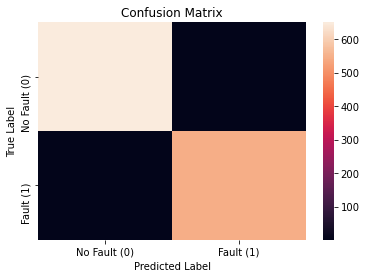

In [54]:
y_pred = tree_clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred.round())
lang = ['No Fault (0)', 'Fault (1)']
ax = plt.axes()
sns.heatmap(conf_mat, xticklabels=lang, yticklabels=lang)
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [55]:
true_positive = conf_mat[1, 1]
true_negative = conf_mat[0, 0]
false_positive = conf_mat[0, 1]
false_negative = conf_mat[1, 0]
accuracy = accuracy_score(y_pred, y_test)
print(" Decision Tree Classifier ")
print("True Positives:", true_positive)
print("True Negatives:", true_negative)
print("False Positives:", false_positive)
print("False Negatives:", false_negative)
print("Precision:", true_positive/(true_positive+false_positive))
print("Recall:", true_positive/(true_positive+false_negative))
print("Accuracy:", accuracy)

 Decision Tree Classifier 
True Positives: 548
True Negatives: 650
False Positives: 1
False Negatives: 2
Precision: 0.9981785063752276
Recall: 0.9963636363636363
Accuracy: 0.9975020815986678


In [56]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

<ipython-input-56-42c4a7591fa9>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

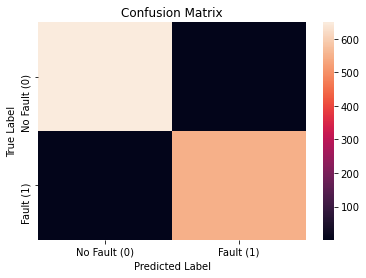

In [57]:
y_pred = forest_clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
lang = ['No Fault (0)', 'Fault (1)']
ax = plt.axes()
sns.heatmap(conf_mat, xticklabels=lang, yticklabels=lang)
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [58]:
true_positive = conf_mat[1, 1]
true_negative = conf_mat[0, 0]
false_positive = conf_mat[0, 1]
false_negative = conf_mat[1, 0]
accuracy = accuracy_score(y_pred, y_test)
print("Random Forest Classifier")
print("True Positives:", true_positive)
print("True Negatives:", true_negative)
print("False Positives:", false_positive)
print("False Negatives:", false_negative)
print("Precision:", true_positive/(true_positive+false_positive))
print("Recall:", true_positive/(true_positive+false_negative))
print("Accuracy:", accuracy)

Random Forest Classifier
True Positives: 549
True Negatives: 649
False Positives: 2
False Negatives: 1
Precision: 0.9963702359346642
Recall: 0.9981818181818182
Accuracy: 0.9975020815986678
